In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_dom = pd.read_csv("domestic_arrivals_by_region.csv")

df_dom["year_month"] = pd.to_datetime(df_dom["year_month"])

df_dom = df_dom[(df_dom["origin_region"] != "UNKNOWN") & (df_dom["destination_region"] != "UNKNOWN")]

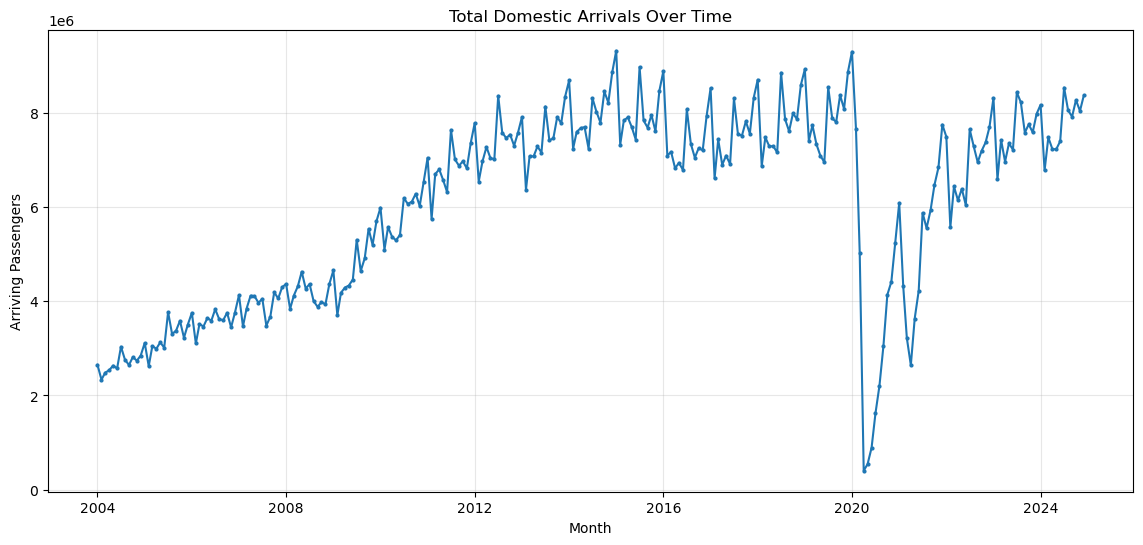

In [3]:
monthly_totals = df_dom.groupby("year_month")["arriving_passengers"].sum()

plt.figure(figsize=(14,6))
plt.plot(monthly_totals.index, monthly_totals.values, marker="o", markersize=2)
plt.title("Total Domestic Arrivals Over Time")
plt.xlabel("Month")
plt.ylabel("Arriving Passengers")
plt.grid(True, alpha=0.3)
plt.show()

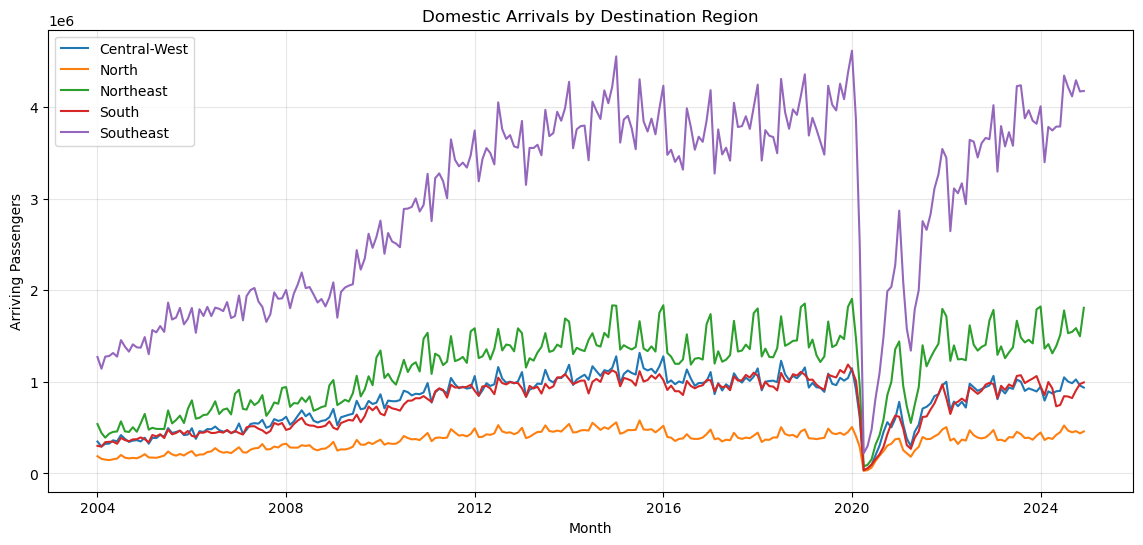

In [4]:
region_totals = df_dom.groupby(["year_month", "destination_region"])["arriving_passengers"].sum().reset_index()

plt.figure(figsize=(14,6))
for region, group in region_totals.groupby("destination_region"):
    plt.plot(pd.to_datetime(group["year_month"]), group["arriving_passengers"], label=region)

plt.title("Domestic Arrivals by Destination Region")
plt.xlabel("Month")
plt.ylabel("Arriving Passengers")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

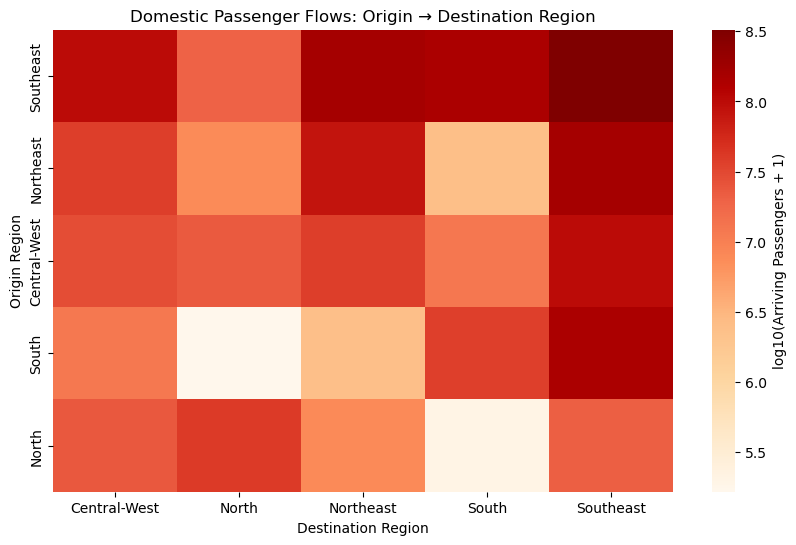

In [7]:
pivot = df_dom.pivot_table(
    index="origin_region",
    columns="destination_region",
    values="arriving_passengers",
    aggfunc="sum",
    fill_value=0
)

top_origins = pivot.sum(axis=1).nlargest(5).index
pivot_top = pivot.loc[top_origins]

pivot_log = np.log10(pivot_top + 1)

plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_log,
    annot=False,
    fmt=".0f",
    cmap="OrRd",
    cbar_kws={"label": "log10(Arriving Passengers + 1)"}
)
plt.title("Domestic Passenger Flows: Origin → Destination Region")
plt.ylabel("Origin Region")
plt.xlabel("Destination Region")
plt.show()

<Figure size 1400x600 with 0 Axes>

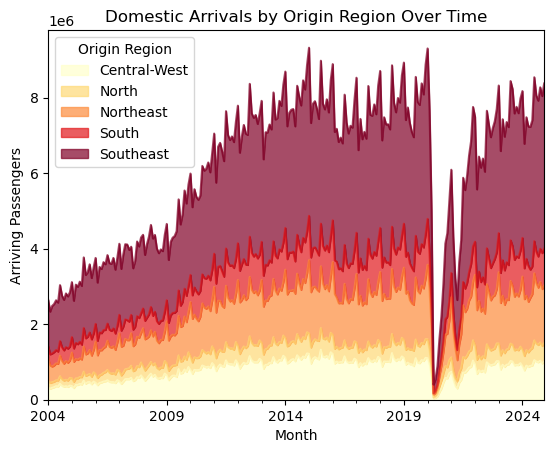

In [8]:
area_totals = df_dom.groupby(["year_month", "origin_region"])["arriving_passengers"].sum().unstack(fill_value=0)

plt.figure(figsize=(14,6))
area_totals.plot.area(colormap="YlOrRd", alpha=0.7)
plt.title("Domestic Arrivals by Origin Region Over Time")
plt.xlabel("Month")
plt.ylabel("Arriving Passengers")
plt.legend(title="Origin Region")
plt.show()